<a href="https://colab.research.google.com/github/ujjwalrajput31/python-ml-portfolio/blob/main/Visualizing_Iris_Flowers_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

iris_data = load_iris()
X = iris_data.data
y = iris_data.target
target_names = iris_data.target_names

# Put into a DataFrame (just to see it nicely)
df_iris = pd.DataFrame(X, columns=iris_data.feature_names)
df_iris["target"] = y
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df_iris.info()
df_iris.describe()
df_iris["target"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,count
target,
0,50
1,50
2,50


In [3]:
features = iris_data.feature_names
X_features = df_iris[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000166


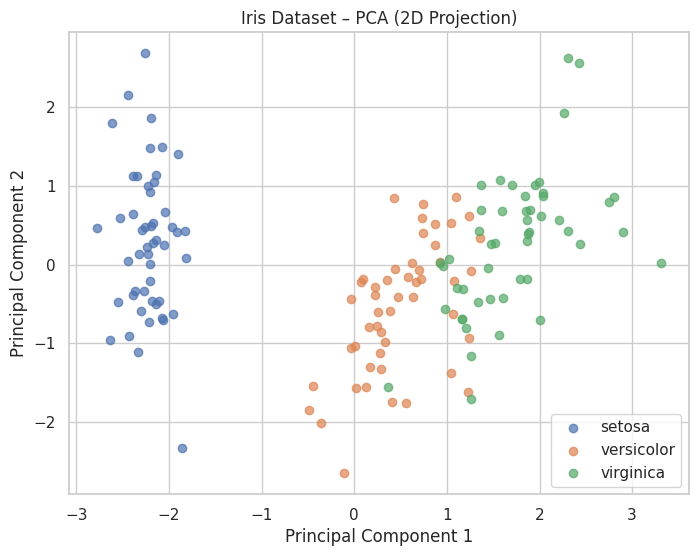

In [5]:
plt.figure(figsize=(8,6))

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=target_name,
        alpha=0.7
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset – PCA (2D Projection)")
plt.legend()
plt.show()

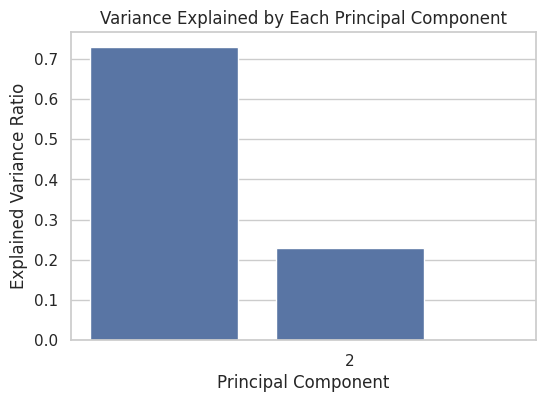

In [6]:
plt.figure(figsize=(6,4))
components = [1, 2]
variance = pca.explained_variance_ratio_

sns.barplot(x=components, y=variance)
plt.xticks(components)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.title("Variance Explained by Each Principal Component")
plt.show()